# Data Wrangling for Tape File 
I will try to make some basic data cleaning and wrangling for one tape file. Also try to create a baseline model only use tape file.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Load Data

In [54]:
tape1= pd.read_csv('./datasets/UoB_Set01_2025-01-02tapes.csv')
tape1.head()

,10.881,267,1
0,11.07,269,1
1,11.22,267,2
2,12.34,270,2
3,13.73,267,3
4,18.32,265,2


In [55]:
# add column names
columns=['Timestamp','Price','Volume']
tape1.columns=columns
print(tape1.head())

# check the datatype
print(tape1.dtypes)

# save the data 
# tape1.to_csv('./datasets/tape1.csv', index=False)

   Timestamp  Price  Volume
0      11.07    269       1
1      11.22    267       2
2      12.34    270       2
3      13.73    267       3
4      18.32    265       2
Timestamp    float64
Price          int64
Volume         int64
dtype: object


### 2. Check NA values
We can see that there is no missing value in the tape file. 

In [56]:
# check for missing values
print(tape1.isna().sum())

Timestamp    0
Price        0
Volume       0
dtype: int64


### 3. Check outliers


In [57]:
# check for outliers
pd.set_option('display.float_format', '{:.2f}'.format)
print(tape1.describe())

       Timestamp    Price   Volume
count   23810.00 23810.00 23810.00
mean    15097.01   280.84     2.01
std      8959.98    12.76     1.16
min        11.07   243.00     1.00
25%      7102.92   271.00     1.00
50%     15112.84   285.00     2.00
75%     22838.70   290.00     3.00
max     30599.73   303.00     5.00


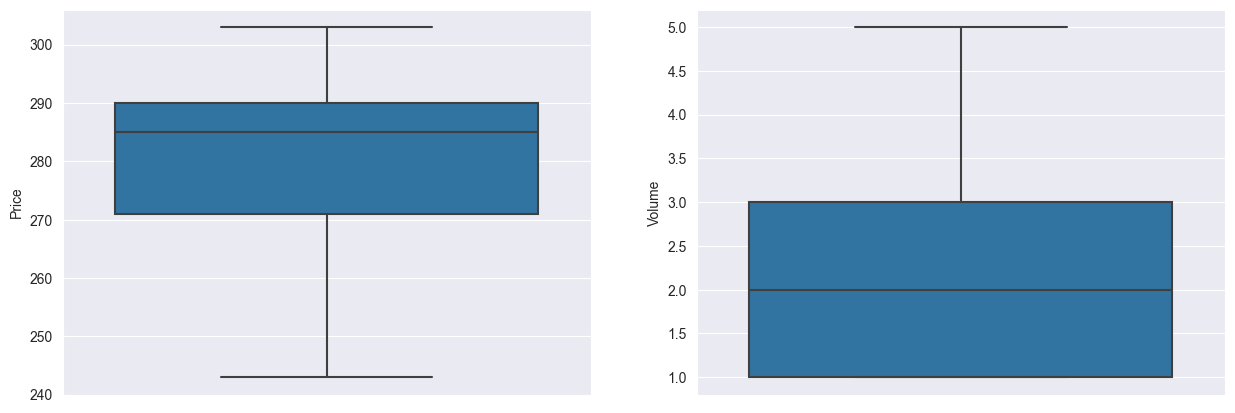

In [58]:
# plot the boxplot of the price and volume
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(y='Price', data=tape1, ax=ax[0])
sns.boxplot(y='Volume', data=tape1, ax=ax[1])
plt.show()

From the Boxplot and the describe table, we can see that there are no outliers in the price and volume columns.

### 4. Check the distribution of the Price column

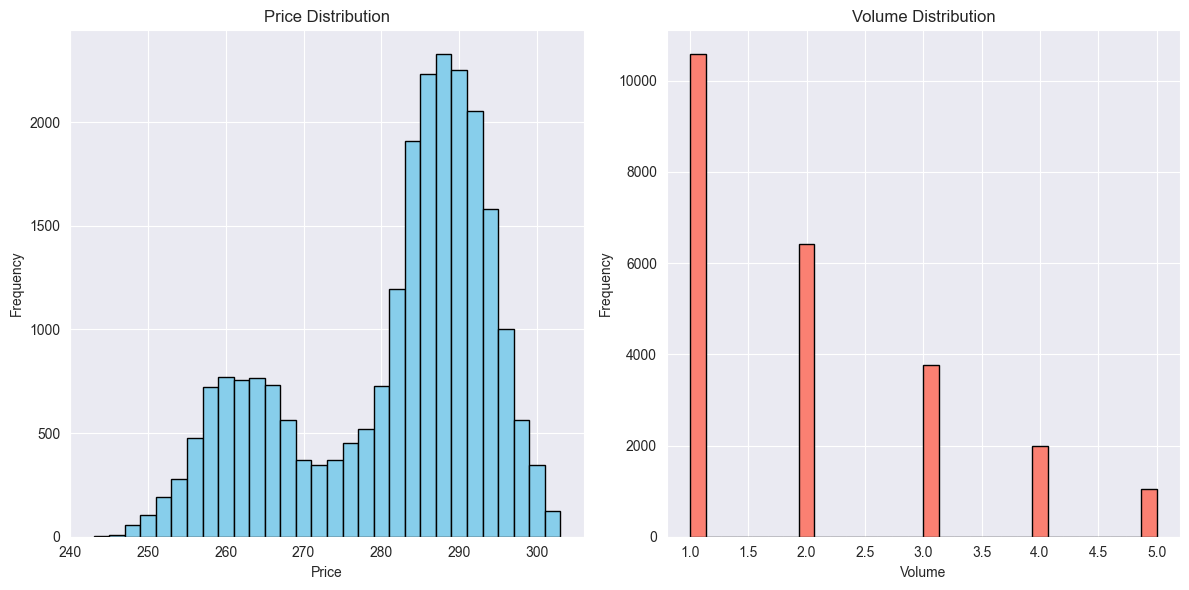

In [62]:
import matplotlib.pyplot as plt

# Plot histograms of Price and Volume
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(tape1['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(tape1['Volume'], bins=30, color='salmon', edgecolor='black')
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


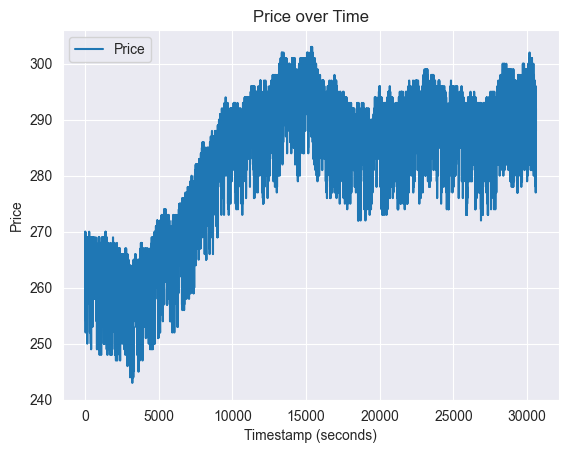

In [60]:
# plot the price over time
plt.plot(tape1['Timestamp'], tape1['Price'], label='Price')
plt.title('Price over Time')
plt.xlabel('Timestamp (seconds)')
plt.ylabel('Price')
plt.legend()

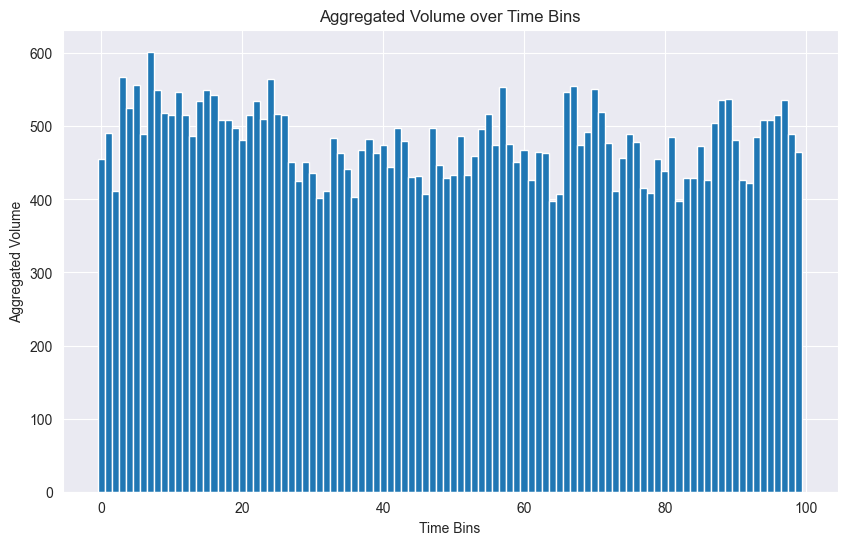

In [61]:
# plot the volume over time

# use cut to create 50 bins for the time
bins = 100
tape1['time_bin'] = pd.cut(tape1['Timestamp'], bins, labels=False)

# group by the time_bins and sum the Volume
volume_binned = tape1.groupby('time_bin')['Volume'].sum()

# BAR PLOT
plt.figure(figsize=(10, 6))
plt.bar(volume_binned.index, volume_binned.values, width=1)  
plt.title('Aggregated Volume over Time Bins')
plt.xlabel('Time Bins')
plt.ylabel('Aggregated Volume')
plt.show()

## 5. Convert the Timestamp to Datetime

In [67]:
# Convert 'Timestamp' to datetime to extract more granular time features
tape1['Timestamp'] = pd.to_datetime(tape1['Timestamp'], unit='s')

# Extract time features
tape1['Hour'] = tape1['Timestamp'].dt.hour
tape1['Minute'] = tape1['Timestamp'].dt.minute

# Display the dataframe to verify time feature extraction
tape1.head()

# save the data
# tape1.to_csv('./datasets/tape1.csv', index=False)

,Timestamp,Price,Volume,time_bin,Hour,Minute
0,1970-01-01 00:00:11.067,269,1,0,0,0
1,1970-01-01 00:00:11.222,267,2,0,0,0
2,1970-01-01 00:00:12.338,270,2,0,0,0
3,1970-01-01 00:00:13.733,267,3,0,0,0
4,1970-01-01 00:00:18.321,265,2,0,0,0
